In [1]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

In [2]:
my_image_path = '../../../../aiffel/camera_sticker/images/image.png' # 얼굴
black_image_path = '../../../camera_sticker/images/man-2785071_1280.jpg' # 가까이 찍은 흑백사진
mans_image_path = '../../../camera_sticker/images/mans.png' # 옆 사진
lay_down_woman_image_path = '../../../camera_sticker/images/woman-3287956_1280.jpg'# 누워있는 여성 사진
lay_down_man_image_path = '../../../camera_sticker/images/serious-man.jpg' # 누워있는 남성 사진
far_image_path = '../../../camera_sticker/images/adult-1851571_1280.jpg' # 멀리서 찍은 사진
kid_image_path = '../../../camera_sticker/images/kids.png' #아이 사진
cat_path = '../../../../aiffel/camera_sticker/images/cat-whiskers.png' # 고양이


In [3]:
image_paths = [my_image_path, black_image_path, mans_image_path, 
              lay_down_man_image_path, lay_down_woman_image_path, 
              far_image_path, kid_image_path]

In [4]:
image_paths

['../../../../aiffel/camera_sticker/images/image.png',
 '../../../camera_sticker/images/man-2785071_1280.jpg',
 '../../../camera_sticker/images/mans.png',
 '../../../camera_sticker/images/serious-man.jpg',
 '../../../camera_sticker/images/woman-3287956_1280.jpg',
 '../../../camera_sticker/images/adult-1851571_1280.jpg',
 '../../../camera_sticker/images/kids.png']

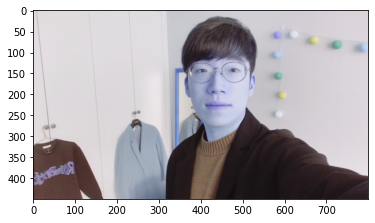

In [5]:

img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

In [6]:
img_rgb_list = []

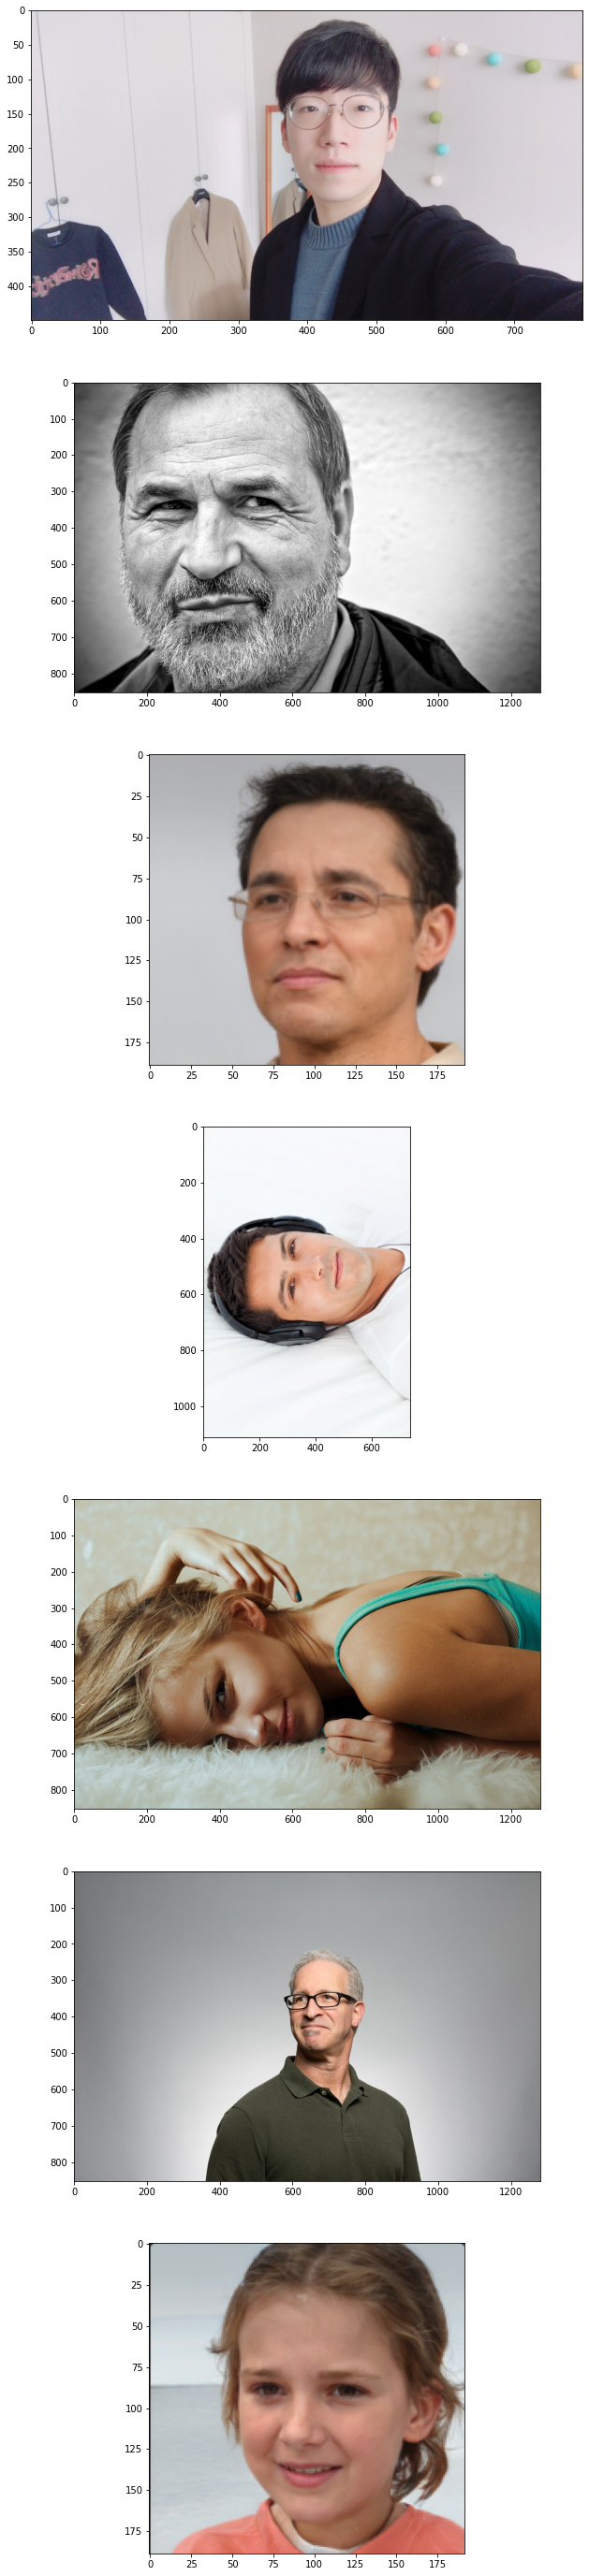

In [7]:
plt.figure(figsize=(50, 50)) # 출력할 그림의 크기를 설정합니다. (선택사항)

for i, image_path in enumerate(image_paths):
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # OpenCV는 BGR 순서로 이미지를 읽기 때문에 RGB로 변환

    plt.subplot(len(image_paths), 1, i+1) # subplot을 생성합니다. 인자는 (행의 수, 열의 수, 현재 이미지의 인덱스) 입니다.
    plt.imshow(img_rgb)
    
    img_rgb_list.append(img_rgb)

plt.show()

In [8]:
img_rgb_list

[array([[[218, 221, 224],
         [219, 220, 224],
         [219, 220, 224],
         ...,
         [217, 213, 219],
         [216, 212, 218],
         [215, 213, 218]],
 
        [[219, 220, 224],
         [219, 220, 224],
         [220, 219, 224],
         ...,
         [217, 213, 219],
         [216, 212, 218],
         [216, 212, 218]],
 
        [[219, 220, 224],
         [220, 219, 224],
         [220, 219, 224],
         ...,
         [217, 213, 219],
         [216, 212, 218],
         [216, 212, 218]],
 
        ...,
 
        [[ 59,  60,  92],
         [ 71,  70, 101],
         [ 66,  64,  92],
         ...,
         [ 36,  33,  46],
         [ 30,  29,  44],
         [ 28,  25,  43]],
 
        [[ 66,  65, 100],
         [ 74,  72, 105],
         [ 70,  67,  98],
         ...,
         [ 30,  28,  41],
         [ 30,  30,  44],
         [ 36,  33,  51]],
 
        [[ 81,  76, 114],
         [ 76,  73, 107],
         [ 70,  65,  98],
         ...,
         [ 25,  24,  37],
  

In [9]:
len(img_rgb_list)

7

In [10]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [11]:
dlib_rects_list=[]

In [12]:
for i in img_rgb_list:
     dlib_rects_list.append(detector_hog(i, 1))

In [13]:
dlib_rects_list[0]

rectangles[[(345, 98) (531, 284)]]

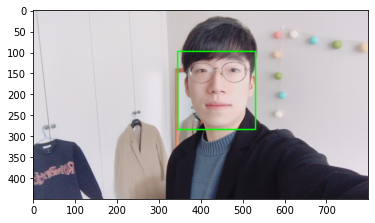

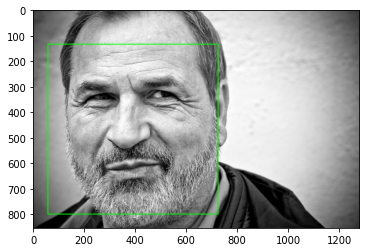

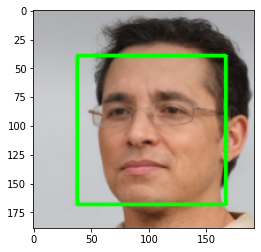

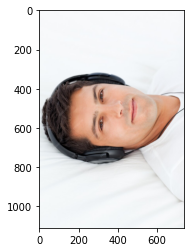

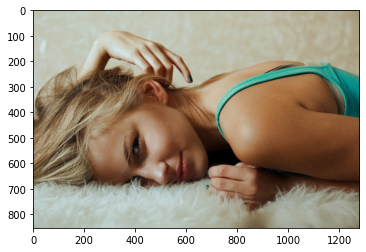

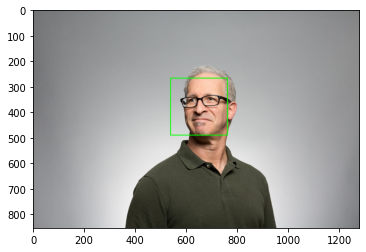

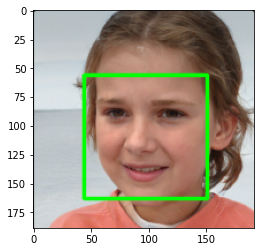

In [14]:
for i in range(len(dlib_rects_list)):
    img_bgr = cv2.imread(image_paths[i]) # 각 루프에서 새로운 이미지를 불러옵니다
    img_show = img_bgr.copy() # 출력용 이미지를 따로 보관합니다

    for dlib_rect in dlib_rects_list[i]: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # 이미지를 RGB로 변환합니다
    plt.imshow(img_show_rgb)
    plt.show()

In [15]:
for i in  range(len(dlib_rects_list)):
    print("%d번째 사진의 좌표 : %s" % (i,dlib_rects_list[i] ))

0번째 사진의 좌표 : rectangles[[(345, 98) (531, 284)]]
1번째 사진의 좌표 : rectangles[[(58, 133) (724, 798)]]
2번째 사진의 좌표 : rectangles[[(38, 39) (167, 168)]]
3번째 사진의 좌표 : rectangles[]
4번째 사진의 좌표 : rectangles[]
5번째 사진의 좌표 : rectangles[[(538, 266) (761, 489)]]
6번째 사진의 좌표 : rectangles[[(44, 56) (151, 163)]]


In [16]:
dlib_rects_list

[rectangles[[(345, 98) (531, 284)]],
 rectangles[[(58, 133) (724, 798)]],
 rectangles[[(38, 39) (167, 168)]],
 rectangles[],
 rectangles[],
 rectangles[[(538, 266) (761, 489)]],
 rectangles[[(44, 56) (151, 163)]]]

In [17]:
# # 'rectangles[]' 요소를 제외한 새로운 리스트 생성
# dlib_rects_list = [item for item in dlib_rects_list if len(item) > 0]

# print(dlib_rects_list)

In [18]:
new_dlib_rects_list = []
remove_dlib_rects_list = []
for index, item in enumerate(dlib_rects_list):
    if len(item) > 0:
        new_dlib_rects_list.append(item)
    else :
        print(index)
        remove_dlib_rects_list.append(index)
dlib_rects_list = new_dlib_rects_list

3
4


In [19]:
remove_dlib_rects_list

[3, 4]

In [20]:
model_path = '../../../camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print(landmark_predictor)

In [21]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

for i in range(len(dlib_rects_list)):
    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    # face landmark 좌표를 저장해둡니다
    for dlib_rect in dlib_rects_list[i]:
        points = landmark_predictor(img_rgb, dlib_rect)
            # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
            # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
            # list_landmarks에 랜드마크 리스트를 저장
    
    try:
        print(len(list_landmarks[i]))
        # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
        # 각 원소는 68개의 랜드마크 위치가 나열된 list 
        # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생
    except: 
        print('얼굴을 찾을 수 없음')

68
68
68
68
68


In [22]:
list_landmarks

[[(359, 165),
  (359, 187),
  (361, 208),
  (367, 229),
  (376, 250),
  (388, 268),
  (403, 284),
  (420, 295),
  (439, 298),
  (459, 295),
  (477, 283),
  (491, 267),
  (504, 248),
  (512, 227),
  (516, 205),
  (517, 184),
  (517, 162),
  (375, 143),
  (386, 136),
  (400, 136),
  (414, 138),
  (426, 144),
  (445, 143),
  (457, 137),
  (471, 135),
  (484, 135),
  (496, 141),
  (436, 157),
  (436, 171),
  (436, 186),
  (436, 201),
  (419, 211),
  (428, 214),
  (437, 216),
  (446, 213),
  (454, 210),
  (389, 158),
  (398, 153),
  (408, 153),
  (416, 158),
  (407, 161),
  (398, 161),
  (456, 158),
  (465, 152),
  (475, 153),
  (484, 157),
  (475, 160),
  (466, 160),
  (405, 242),
  (416, 236),
  (429, 233),
  (437, 235),
  (445, 233),
  (459, 235),
  (471, 241),
  (461, 252),
  (448, 258),
  (438, 259),
  (429, 258),
  (416, 253),
  (410, 242),
  (429, 240),
  (437, 241),
  (446, 240),
  (466, 241),
  (446, 246),
  (438, 248),
  (429, 247)],
 [(107, 373),
  (109, 450),
  (117, 527),
  (13

In [29]:
image_paths

['../../../../aiffel/camera_sticker/images/image.png',
 '../../../camera_sticker/images/man-2785071_1280.jpg',
 '../../../camera_sticker/images/mans.png',
 '../../../camera_sticker/images/adult-1851571_1280.jpg',
 '../../../camera_sticker/images/kids.png']

In [27]:
for i in sorted(remove_dlib_rects_list, reverse=True):
    image_paths.pop(i)

print(image_paths)

['../../../../aiffel/camera_sticker/images/image.png', '../../../camera_sticker/images/man-2785071_1280.jpg', '../../../camera_sticker/images/mans.png', '../../../camera_sticker/images/adult-1851571_1280.jpg', '../../../camera_sticker/images/kids.png']


In [28]:
image_paths

['../../../../aiffel/camera_sticker/images/image.png',
 '../../../camera_sticker/images/man-2785071_1280.jpg',
 '../../../camera_sticker/images/mans.png',
 '../../../camera_sticker/images/adult-1851571_1280.jpg',
 '../../../camera_sticker/images/kids.png']

In [39]:
list_landmarks[1]

[(107, 373),
 (109, 450),
 (117, 527),
 (137, 602),
 (169, 675),
 (213, 742),
 (265, 799),
 (326, 839),
 (396, 849),
 (468, 837),
 (531, 795),
 (582, 736),
 (626, 668),
 (655, 594),
 (671, 517),
 (675, 440),
 (675, 363),
 (167, 294),
 (206, 270),
 (254, 267),
 (303, 275),
 (347, 296),
 (417, 295),
 (460, 273),
 (509, 264),
 (557, 266),
 (600, 286),
 (383, 343),
 (384, 396),
 (384, 447),
 (384, 500),
 (324, 536),
 (354, 547),
 (387, 555),
 (419, 546),
 (449, 534),
 (216, 349),
 (246, 331),
 (282, 329),
 (314, 349),
 (280, 357),
 (247, 358),
 (456, 347),
 (488, 327),
 (525, 328),
 (556, 344),
 (525, 355),
 (491, 355),
 (274, 646),
 (313, 625),
 (358, 617),
 (388, 622),
 (418, 616),
 (465, 622),
 (509, 643),
 (473, 683),
 (425, 704),
 (392, 709),
 (359, 706),
 (312, 687),
 (292, 647),
 (358, 640),
 (388, 643),
 (419, 639),
 (490, 644),
 (421, 663),
 (390, 668),
 (359, 665)]

In [40]:
for i in range(len(dlib_rects_list)):
    print(i)

0
1
2
3
4


In [41]:
for i in range(len(dlib_rects_list)):
    img_bgr = cv2.imread(image_paths[i])  # 각 루프에서 새로운 이미지를 불러옵니다
    img_show = img_bgr.copy()  # 출력용 이미지를 따로 보관합니다
    # list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
    for landmark in list_landmarks[i]:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)
                # cv2.circle: OpenCV의 원을 그리는 함수
                # img_show 이미지 위 각각의 point에
                # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
                # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        # RGB 이미지로 전환
    plt.imshow(img_show_rgb)
        # 이미지를 준비
    plt.show()
        # 이미지를 출력

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Input argument doesn't provide sequence protocol
>  - Can't parse 'center'. Input argument doesn't provide sequence protocol


landmark: (359, 165)
point: 359
point: 165
landmark: (359, 187)
point: 359
point: 187
landmark: (361, 208)
point: 361
point: 208
landmark: (367, 229)
point: 367
point: 229
landmark: (376, 250)
point: 376
point: 250
landmark: (388, 268)
point: 388
point: 268
landmark: (403, 284)
point: 403
point: 284
landmark: (420, 295)
point: 420
point: 295
landmark: (439, 298)
point: 439
point: 298
landmark: (459, 295)
point: 459
point: 295
landmark: (477, 283)
point: 477
point: 283
landmark: (491, 267)
point: 491
point: 267
landmark: (504, 248)
point: 504
point: 248
landmark: (512, 227)
point: 512
point: 227
landmark: (516, 205)
point: 516
point: 205
landmark: (517, 184)
point: 517
point: 184
landmark: (517, 162)
point: 517
point: 162
landmark: (375, 143)
point: 375
point: 143
landmark: (386, 136)
point: 386
point: 136
landmark: (400, 136)
point: 400
point: 136
landmark: (414, 138)
point: 414
point: 138
landmark: (426, 144)
point: 426
point: 144
landmark: (445, 143)
point: 445
point: 143
landmark: (

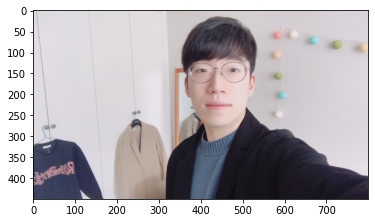

landmark: (107, 373)
point: 107
point: 373
landmark: (109, 450)
point: 109
point: 450
landmark: (117, 527)
point: 117
point: 527
landmark: (137, 602)
point: 137
point: 602
landmark: (169, 675)
point: 169
point: 675
landmark: (213, 742)
point: 213
point: 742
landmark: (265, 799)
point: 265
point: 799
landmark: (326, 839)
point: 326
point: 839
landmark: (396, 849)
point: 396
point: 849
landmark: (468, 837)
point: 468
point: 837
landmark: (531, 795)
point: 531
point: 795
landmark: (582, 736)
point: 582
point: 736
landmark: (626, 668)
point: 626
point: 668
landmark: (655, 594)
point: 655
point: 594
landmark: (671, 517)
point: 671
point: 517
landmark: (675, 440)
point: 675
point: 440
landmark: (675, 363)
point: 675
point: 363
landmark: (167, 294)
point: 167
point: 294
landmark: (206, 270)
point: 206
point: 270
landmark: (254, 267)
point: 254
point: 267
landmark: (303, 275)
point: 303
point: 275
landmark: (347, 296)
point: 347
point: 296
landmark: (417, 295)
point: 417
point: 295
landmark: (

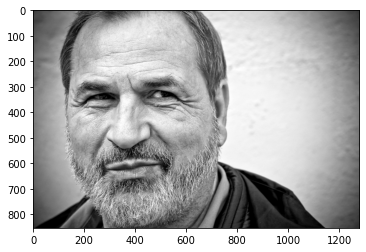

landmark: (54, 88)
point: 54
point: 88
landmark: (54, 101)
point: 54
point: 101
landmark: (54, 113)
point: 54
point: 113
landmark: (57, 125)
point: 57
point: 125
landmark: (61, 136)
point: 61
point: 136
landmark: (68, 146)
point: 68
point: 146
landmark: (75, 156)
point: 75
point: 156
landmark: (83, 166)
point: 83
point: 166
landmark: (94, 170)
point: 94
point: 170
landmark: (107, 169)
point: 107
point: 169
landmark: (120, 164)
point: 120
point: 164
landmark: (133, 156)
point: 133
point: 156
landmark: (144, 145)
point: 144
point: 145
landmark: (151, 132)
point: 151
point: 132
landmark: (155, 118)
point: 155
point: 118
landmark: (158, 102)
point: 158
point: 102
landmark: (159, 86)
point: 159
point: 86
landmark: (55, 80)
point: 55
point: 80
landmark: (60, 76)
point: 60
point: 76
landmark: (67, 75)
point: 67
point: 75
landmark: (75, 76)
point: 75
point: 76
landmark: (82, 79)
point: 82
point: 79
landmark: (102, 79)
point: 102
point: 79
landmark: (112, 77)
point: 112
point: 77
landmark: (122

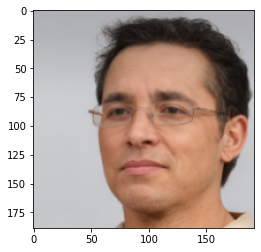

landmark: (554, 347)
point: 554
point: 347
landmark: (555, 372)
point: 555
point: 372
landmark: (558, 398)
point: 558
point: 398
landmark: (565, 423)
point: 565
point: 423
landmark: (575, 448)
point: 575
point: 448
landmark: (590, 470)
point: 590
point: 470
landmark: (607, 489)
point: 607
point: 489
landmark: (628, 503)
point: 628
point: 503
landmark: (651, 506)
point: 651
point: 506
landmark: (675, 502)
point: 675
point: 502
landmark: (696, 488)
point: 696
point: 488
landmark: (714, 468)
point: 714
point: 468
landmark: (728, 446)
point: 728
point: 446
landmark: (738, 420)
point: 738
point: 420
landmark: (743, 395)
point: 743
point: 395
landmark: (745, 369)
point: 745
point: 369
landmark: (745, 343)
point: 745
point: 343
landmark: (574, 320)
point: 574
point: 320
landmark: (588, 312)
point: 588
point: 312
landmark: (604, 311)
point: 604
point: 311
landmark: (620, 313)
point: 620
point: 313
landmark: (635, 321)
point: 635
point: 321
landmark: (658, 320)
point: 658
point: 320
landmark: (

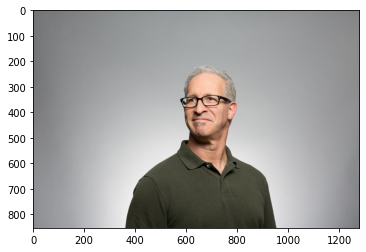

landmark: (54, 88)
point: 54
point: 88
landmark: (54, 100)
point: 54
point: 100
landmark: (55, 112)
point: 55
point: 112
landmark: (57, 124)
point: 57
point: 124
landmark: (61, 136)
point: 61
point: 136
landmark: (67, 146)
point: 67
point: 146
landmark: (75, 156)
point: 75
point: 156
landmark: (84, 166)
point: 84
point: 166
landmark: (95, 170)
point: 95
point: 170
landmark: (108, 169)
point: 108
point: 169
landmark: (121, 163)
point: 121
point: 163
landmark: (134, 155)
point: 134
point: 155
landmark: (145, 144)
point: 145
point: 144
landmark: (151, 132)
point: 151
point: 132
landmark: (155, 117)
point: 155
point: 117
landmark: (158, 102)
point: 158
point: 102
landmark: (159, 86)
point: 159
point: 86
landmark: (55, 80)
point: 55
point: 80
landmark: (60, 76)
point: 60
point: 76
landmark: (67, 76)
point: 67
point: 76
landmark: (75, 76)
point: 75
point: 76
landmark: (82, 79)
point: 82
point: 79
landmark: (101, 79)
point: 101
point: 79
landmark: (111, 77)
point: 111
point: 77
landmark: (122

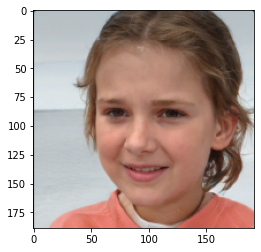

In [44]:
for i in range(len(dlib_rects_list)):
    img_bgr = cv2.imread(image_paths[i])
    img_show = img_bgr.copy()

    for landmark in list_landmarks[i]:
        print(f'landmark: {landmark}')  # landmark의 형식 확인
        for point in landmark:
            print(f'point: {point}')  # point의 형식 확인
            

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()


In [ ]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

In [ ]:
img_sticker = cv2.imread(cat_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

In [ ]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y  #- h 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

In [ ]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

In [ ]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


In [ ]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()